# Assignment 10

第10节   机器学习算法（k-means，svm，贝叶斯，随机森林，xgboost 等）

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

A: 假设每个特征发生的概率是互相独立的。

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

A: MAP(maximum a posterior): 最大后验概率估计是想求$θ$使$P（X_0|θ）P(θ)$最大。求得的$θ$不单单让似然函数大，$θ$自己出现的先验概率也得大。
   MAP其实是在最大化 $P（θ|X_0)=P（X_0|θ）P(θ)/P(X_0)$, 不过因为$x_0$是确定的,$P(X_0)$是一个已知值，所以去掉了分母$P(X_0)$.
   

   ML(maximum likelihood)：给定一堆数据，假如我们知道它是从某一种分布中随机取出来的，可是我们并不知道这个分布具体的参，即“模型已定，参数未知”。例如，我们知道这个分布是正态分布，但是不知道均值和方差；或者是二项分布，但是不知道均值。 最大似然估计（MLE，Maximum Likelihood Estimation）就可以用来估计模型的参数。MLE的目标是找出一组参数$θ$，使得模型产生出观测数据的概率$P（X_0|θ）$最大

#### 3. What is support vector in SVM?

A: SVM中距离划分样本的超平面最近的样本点叫support vector 


支持向量机（support vector machines）是一种二分类模型，它的目的是寻找一个超平面来对样本进行分割，分割的原则是间隔最大化。
   
   划分超平面可通过如下线性方程来描述： $w^T x+b=0$。其中$w$为法向量，决定了超平面的方向，$b$为位移量，决定了超平面与原点的距离。假设超平面能将训练样本正确地分类，即对于训练样本$(x_i,y_i)$，满足以下公式：
   $$  
             \begin{cases}
             w^T x_i+b\geq+1 ,\, y_i =+1 \\
             w^T x_i+b\leq-1 ,\, y_i =-1  \\
             \end{cases}
$$
   该公式被称为最大间隔假设，$y_i=+1$ 表示样本为正样本，$y_i=−1$ 表示样本为负样本，式子前面选择大于等于+1，小于等于-1只是为了计算方便，原则上可以是任意常数，但无论是多少，都可以通过对$ w $的变换使其为 +1 和 -1 。实际上该公式等价于$y_i( w^T x_i+b)\geq+1$；
   
   距离超平面最近的这几个样本点满足$y_i( w^T x_i+b)=+1$，它们被称为“支持向量。

#### 4. What is the intuition behind SVM ?

A: 一个点距离分离超平面的远近可以表示分类预测的确信度。所以SVM的目标是寻找一个超平面，使得离超平面较近的异类点之间能有更大的间隔，即不必考虑所有样本点，只需让求得的超平面使得离它近的点间隔最大。

#### 5. Shortly describ what 'random' means in random forest ?

A: 随机森林顾名思义，是用随机的方式建立一个森林，森林里面有很多的决策树组成，随机森林的每一棵决策树之间是没有关联的。随机性体现在：
   
   1.从原始训练样本集N中有放回地重复随机抽取k个样本生成新的训练样本集合。
   
   2.特征选择采用随机的方法去分裂每一个节点。

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

A: 计算损失函数对每个样本预测值的导数，通过导数信息寻找最优分裂点。

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

In [1]:
import pandas as pd

In [22]:
fname = 'F:/export_sql_1558435/sqlResult_1558435new3.csv'

In [23]:
content = pd.read_csv(fname, encoding='utf-8')

In [34]:
content.head()

,Unnamed: 0,source,content
0,0,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\r...
1,1,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\...
2,2,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\r\r\r\n 周四开盘上证50在银行券商大蓝筹带...
3,3,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...
4,4,证券时报网,?\r\r\r\r\n 巨丰早评：市场将再次探底\r\r\r\r\n 【巨丰观点】\r\...


In [33]:
content.shape[0]

25109

In [35]:
df = pd.DataFrame()
df['source'] = content['source']
df['content'] = content['content']
df['label'] = 0
df = df.dropna()
df = df.drop_duplicates()   #去除重复

In [36]:
df.head()

,source,content,label
0,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\r...,0
1,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\...,0
2,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\r\r\r\n 周四开盘上证50在银行券商大蓝筹带...,0
3,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,0
4,证券时报网,?\r\r\r\r\n 巨丰早评：市场将再次探底\r\r\r\r\n 【巨丰观点】\r\...,0


In [37]:
df.loc.__setitem__((df.loc[df['source']=='新华社'].index,'label'),1)

In [38]:
df.head()

,source,content,label
0,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\r...,0
1,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\...,1
2,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\r\r\r\n 周四开盘上证50在银行券商大蓝筹带...,0
3,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,0
4,证券时报网,?\r\r\r\r\n 巨丰早评：市场将再次探底\r\r\r\r\n 【巨丰观点】\r\...,0


In [39]:
import re

def strip_merge(content_lines):
    content_lines_list = map(lambda content_line: content_line.strip(), re.split(r"[\n\\n;?■↑*□●]", content_lines))
    return ''.join(content_lines_list)

In [40]:
df['content'] = df['content'].apply(strip_merge)

In [41]:
import jieba

def cut(string):
    return list(jieba.cut(string))

In [42]:
df['content']=df['content'].apply(lambda i:cut(i))

In [43]:
df.tail()

,source,content,label
25104,新华社,"[新华社, 照片, ，, 外代, ，, 2017, 年, 6, 月, 7, 日, （, 外代...",1
25105,新华社,"[新华社, 照片, ，, 外代, ，, 2017, 年, 6, 月, 7, 日, （, 外代...",1
25106,新华社,"[新华社, 照片, ，, 外代, ，, 2017, 年, 6, 月, 7, 日, （, 外代...",1
25107,新华社,"[新华社, 照片, ，, 北京, ，, 2017, 年, 6, 月, 7, 日, 电影, 《...",1
25108,新华社,"[新华社, 照片, ，, 北京, ，, 2017, 年, 6, 月, 7, 日, 电影, 《...",1


In [45]:
df.loc[25108,'content'][0]

'新华社'

In [46]:
#去掉新闻正文的‘新华社’字样
for i in df['content']:
    if '新华社' in i:
        i.remove('新华社') 

In [48]:
df.loc[25108,'content'][0]

'照片'

In [49]:
df['content'] =[' '.join(i) for i in df['content']]

In [50]:
df.tail()

,source,content,label
25104,新华社,照片 ， 外代 ， 2017 年 6 月 7 日 （ 外代 二线 ） 足球 — — 国际 友...,1
25105,新华社,照片 ， 外代 ， 2017 年 6 月 7 日 （ 外代 二线 ） 足球 — — 国际 友...,1
25106,新华社,照片 ， 外代 ， 2017 年 6 月 7 日 （ 外代 二线 ） 足球 — — 国际 友...,1
25107,新华社,照片 ， 北京 ， 2017 年 6 月 7 日 电影 《 血战 湘江 》 举行 清华大学 ...,1
25108,新华社,照片 ， 北京 ， 2017 年 6 月 7 日 电影 《 血战 湘江 》 举行 清华大学 ...,1


In [51]:
df['label'].values

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split

y = df['label'].values

x_train, x_test, y_train, y_test = train_test_split(df['content'].values, y,          #  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

print (x_train.shape)
print (x_test.shape)

(20898,)
(2322,)


In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [56]:
#停用词
stwlist=[line.strip() for line in open('F:/BaiduYunDownload/Project01/content/stopwords.txt',
                                       'r',encoding='utf-8').readlines()]

# Vectorize the sentence

In [57]:
# 采用普通统计CountVectorizer提取特征向量
# 默认配置不去除停用词
count_vec = CountVectorizer()
x_count_train = count_vec.fit_transform(x_train)
x_count_test = count_vec.transform(x_test)

# 去除停用词
count_stop_vec = CountVectorizer(analyzer='word', stop_words=stwlist)
x_count_stop_train = count_stop_vec.fit_transform(x_train)
x_count_stop_test = count_stop_vec.transform(x_test)

# 采用TfidfVectorizer提取文本特征向量
# 默认配置不去除停用词
tfid_vec = TfidfVectorizer()
x_tfid_train = tfid_vec.fit_transform(x_train)
x_tfid_test = tfid_vec.transform(x_test)

# 去除停用词
tfid_stop_vec = TfidfVectorizer(analyzer='word', stop_words=stwlist)
x_tfid_stop_train = tfid_stop_vec.fit_transform(x_train)
x_tfid_stop_test = tfid_stop_vec.transform(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

# 贝叶斯分类器

In [58]:
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics

In [59]:
# 使用朴素贝叶斯分类器  分别对两种提取出来的特征值进行学习和预测
# 对普通通统计CountVectorizer提取特征向量 学习和预测
mnb_count = MultinomialNB()

t0=time()
mnb_count.fit(x_count_train, y_train)   # 学习
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
mnb_count_y_predict = mnb_count.predict(x_count_test)   # 预测
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, mnb_count_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")
 
# 模型评估
# 对普通统计CountVectorizer提取的特征学习模型进行评估
print("未去除停用词的CountVectorizer提取的特征学习模型准确率：", mnb_count.score(x_count_test, y_test))
print("评估指标:\n", classification_report(mnb_count_y_predict, y_test))

results = []
results.append(('NB_count',score,train_time,test_time))

train time: 2.680s
test time: 0.310s
accuracy:   0.925
 
未去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9250645994832042
评估指标:
               precision    recall  f1-score   support

           0       0.82      0.59      0.69       325
           1       0.94      0.98      0.96      1997

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.88      0.79      0.82      2322
weighted avg       0.92      0.93      0.92      2322



In [60]:
# 对普通通统计CountVectorizer提取特征向量 学习和预测
# 去除停用词
mnb_count_stop = MultinomialNB()

t0=time()
mnb_count_stop.fit(x_count_stop_train, y_train)   # 学习
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
mnb_count_stop_y_predict = mnb_count_stop.predict(x_count_stop_test)    # 预测
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, mnb_count_stop_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的CountVectorizer提取的特征学习模型准确率：", mnb_count_stop.score(x_count_stop_test, y_test))
print("评估指标:\n", classification_report(mnb_count_stop_y_predict, y_test))

results.append(('NB_count_rmvstpw',score,train_time,test_time))

train time: 0.081s
test time: 0.010s
accuracy:   0.927
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9272179155900087
评估指标:
               precision    recall  f1-score   support

           0       0.82      0.60      0.70       320
           1       0.94      0.98      0.96      2002

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.88      0.79      0.83      2322
weighted avg       0.92      0.93      0.92      2322



In [61]:
# 对TfidfVectorizer提取文本特征向量 学习和预测
mnb_tfid = MultinomialNB()

t0=time()
mnb_tfid.fit(x_tfid_train, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
mnb_tfid_y_predict = mnb_tfid.predict(x_tfid_test)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, mnb_tfid_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

# 对TfidVectorizer提取的特征学习模型进行评估
print("TfidVectorizer提取的特征学习模型准确率：", mnb_tfid.score(x_tfid_test, y_test))
print("评估指标:\n", classification_report(mnb_tfid_y_predict, y_test))

results.append(('NB_tfid',score,train_time,test_time))

train time: 0.094s
test time: 0.009s
accuracy:   0.901
 
TfidVectorizer提取的特征学习模型准确率： 0.9013781223083549
评估指标:
               precision    recall  f1-score   support

           0       0.03      1.00      0.05         6
           1       1.00      0.90      0.95      2316

   micro avg       0.90      0.90      0.90      2322
   macro avg       0.51      0.95      0.50      2322
weighted avg       1.00      0.90      0.95      2322



In [62]:
# 去除停用词
mnb_tfid_stop = MultinomialNB()

t0=time()
mnb_tfid_stop.fit(x_tfid_stop_train, y_train)   # 学习
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
mnb_tfid_stop_y_predict = mnb_tfid_stop.predict(x_tfid_stop_test)    # 预测
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, mnb_tfid_stop_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", mnb_tfid_stop.score(x_tfid_stop_test, y_test))
print("评估指标:\n", classification_report(mnb_tfid_stop_y_predict, y_test))

results.append(('NB_tfid_rmvstpw',score,train_time,test_time))

train time: 0.080s
test time: 0.009s
accuracy:   0.901
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9013781223083549
评估指标:
               precision    recall  f1-score   support

           0       0.03      1.00      0.05         6
           1       1.00      0.90      0.95      2316

   micro avg       0.90      0.90      0.90      2322
   macro avg       0.51      0.95      0.50      2322
weighted avg       1.00      0.90      0.95      2322



### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

# 去停用词效果会好一丢丢，下面的模型使用去停用词的数据训练

# KNN

In [63]:
# from sklearn.pipeline import Pipeline #管道机制
# from sklearn.preprocessing import StandardScaler #标准化/归一化数据
from sklearn.neighbors import KNeighborsClassifier #knn分类

In [64]:
knn_count_stop = KNeighborsClassifier(n_neighbors=5)

t0=time()
knn_count_stop.fit(x_count_stop_train,y_train) #训练模型
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
knn_count_stop_y_predict=knn_count_stop.predict(x_count_stop_test) #预测结果
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, knn_count_stop_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

# 对TfidVectorizer提取的特征学习模型进行评估
print("去除停用词的CountVectorizer提取的特征学习模型准确率：", knn_count_stop.score(x_count_stop_test, y_test))
print("评估指标:\n", classification_report(knn_count_stop_y_predict, y_test))

results.append(('KNN_count_rmvstpw',score,train_time,test_time))

train time: 0.066s
test time: 181.761s
accuracy:   0.909
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.909130060292851
评估指标:
               precision    recall  f1-score   support

           0       0.29      0.61      0.39       112
           1       0.98      0.92      0.95      2210

   micro avg       0.91      0.91      0.91      2322
   macro avg       0.63      0.77      0.67      2322
weighted avg       0.95      0.91      0.92      2322



In [65]:
knn_tfid_stop = KNeighborsClassifier(n_neighbors=5)

t0=time()
knn_tfid_stop.fit(x_tfid_stop_train, y_train)   # 学习
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
knn_tfid_stop_y_predict = knn_tfid_stop.predict(x_tfid_stop_test)    # 预测
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, knn_tfid_stop_y_predict)
test_time=time()-t0
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", knn_tfid_stop.score(x_tfid_stop_test, y_test))
print("评估指标:\n", classification_report(knn_tfid_stop_y_predict, y_test))

results.append(('KNN_tfid_rmvstpw',score,train_time,test_time))

train time: 5.200s
test time: 181.761s
accuracy:   0.905
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.905254091300603
评估指标:
               precision    recall  f1-score   support

           0       0.07      0.94      0.13        17
           1       1.00      0.90      0.95      2305

   micro avg       0.91      0.91      0.91      2322
   macro avg       0.53      0.92      0.54      2322
weighted avg       0.99      0.91      0.94      2322



# random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_count_stop = RandomForestClassifier()

t0=time()
rf_count_stop.fit(x_count_stop_train,y_train) #训练模型
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
rf_count_stop_y_predict=rf_count_stop.predict(x_count_stop_test) #预测结果
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, rf_count_stop_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

# 对TfidVectorizer提取的特征学习模型进行评估
print("去除停用词的CountVectorizer提取的特征学习模型准确率：", rf_count_stop.score(x_count_stop_test, y_test))
print("评估指标:\n", classification_report(rf_count_stop_y_predict, y_test))

results.append(('rf_count_rmvstpw',score,train_time,test_time))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train time: 13.756s
test time: 0.415s
accuracy:   0.939
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9392764857881137
评估指标:
               precision    recall  f1-score   support

           0       0.49      0.85      0.62       136
           1       0.99      0.95      0.97      2186

   micro avg       0.94      0.94      0.94      2322
   macro avg       0.74      0.90      0.79      2322
weighted avg       0.96      0.94      0.95      2322



In [68]:
# 去除停用词
rf_tfid_stop = RandomForestClassifier()

t0=time()
rf_tfid_stop.fit(x_tfid_stop_train, y_train)   # 学习
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
rf_tfid_stop_y_predict = rf_tfid_stop.predict(x_tfid_stop_test)    # 预测
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, rf_tfid_stop_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", rf_tfid_stop.score(x_tfid_stop_test, y_test))
print("评估指标:\n", classification_report(rf_tfid_stop_y_predict, y_test))

results.append(('rf_tfid_rmvstpw',score,train_time,test_time))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train time: 27.288s
test time: 1.008s
accuracy:   0.928
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9276485788113695
评估指标:
               precision    recall  f1-score   support

           0       0.34      0.87      0.48        91
           1       0.99      0.93      0.96      2231

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.67      0.90      0.72      2322
weighted avg       0.97      0.93      0.94      2322



# svm

In [69]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler #标准化/归一化数据

In [71]:
#SVD降维
svd_count = TruncatedSVD(n_components=120)
svd_count.fit(x_count_stop_train)
x_count_train_svd = svd_count.transform(x_count_stop_train)
x_count_test_svd = svd_count.transform(x_count_stop_test)

#归一化数据
scl_count = StandardScaler()
scl_count.fit(x_count_train_svd)
x_count_train_svd_scl = scl_count.transform(x_count_train_svd)
x_count_test_svd_scl = scl_count.transform(x_count_test_svd)

#SVD降维
svd_tfid = TruncatedSVD(n_components=120)
svd_tfid.fit(x_tfid_stop_train)
x_tfid_train_svd = svd_tfid.transform(x_tfid_stop_train)
x_tfid_test_svd = svd_tfid.transform(x_tfid_stop_test)

#归一化数据
scl_tfid = StandardScaler()
scl_tfid.fit(x_tfid_train_svd)
x_tfid_train_svd_scl = scl_tfid.transform(x_tfid_train_svd)
x_tfid_test_svd_scl = scl_tfid.transform(x_tfid_test_svd)

In [72]:
#svm
svm_count = SVC() 

t0=time()
svm_count.fit(x_count_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
svm_count_y_predict = svm_count.predict(x_count_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, svm_count_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的CountVectorizer提取的特征学习模型准确率：", svm_count.score(x_count_test_svd_scl, y_test))
print("评估指标:\n", classification_report(svm_count_y_predict, y_test))

results.append(('svm_count_rmvstpw',score,train_time,test_time))

train time: 103.976s
test time: 2.790s
accuracy:   0.929
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9289405684754521
评估指标:
               precision    recall  f1-score   support

           0       0.35      0.86      0.50        96
           1       0.99      0.93      0.96      2226

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.67      0.90      0.73      2322
weighted avg       0.97      0.93      0.94      2322



In [73]:
#svm
svm_tfid = SVC() 

t0=time()
svm_tfid.fit(x_tfid_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
svm_tfid_y_predict = svm_tfid.predict(x_tfid_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, svm_tfid_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", svm_tfid.score(x_tfid_test_svd_scl, y_test))
print("评估指标:\n", classification_report(svm_tfid_y_predict, y_test))

results.append(('svm_tfid_rmvstpw',score,train_time,test_time))

train time: 32.105s
test time: 2.507s
accuracy:   0.923
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9229112833763996
评估指标:
               precision    recall  f1-score   support

           0       0.29      0.85      0.43        80
           1       0.99      0.93      0.96      2242

   micro avg       0.92      0.92      0.92      2322
   macro avg       0.64      0.89      0.70      2322
weighted avg       0.97      0.92      0.94      2322



# XGBoost

In [76]:
import xgboost as xgb

In [75]:
#!pip install xgboost

Looking in indexes: http://pypi.douban.com/simple


In [77]:
#svd降维归一化后的数据
xgb_count = xgb.XGBClassifier(nthread=10)

t0=time()
xgb_count.fit(x_count_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
xgb_count_y_predict = xgb_count.predict(x_count_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, xgb_count_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的CountVectorizer提取的特征学习模型准确率：", xgb_count.score(x_count_test_svd_scl, y_test))
print("评估指标:\n", classification_report(xgb_count_y_predict, y_test))

results.append(('xgb_count_rmvstpw',score,train_time,test_time))

train time: 26.675s
test time: 0.500s
accuracy:   0.929
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9289405684754521
评估指标:
               precision    recall  f1-score   support

           0       0.40      0.80      0.53       118
           1       0.99      0.94      0.96      2204

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.69      0.87      0.75      2322
weighted avg       0.96      0.93      0.94      2322



In [78]:
#svd降维归一化后的数据
xgb_count_2 = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                              subsample=0.8, nthread=10, learning_rate=0.1)

t0=time()
xgb_count_2.fit(x_count_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
xgb_count_2_y_predict = xgb_count_2.predict(x_count_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, xgb_count_2_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的CountVectorizer提取的特征学习模型准确率：", xgb_count_2.score(x_count_test_svd_scl, y_test))
print("评估指标:\n", classification_report(xgb_count_2_y_predict, y_test))

results.append(('xgb_count_2_rmvstpw',score,train_time,test_time))

train time: 76.511s
test time: 0.090s
accuracy:   0.947
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9465977605512489
评估指标:
               precision    recall  f1-score   support

           0       0.56      0.87      0.68       151
           1       0.99      0.95      0.97      2171

   micro avg       0.95      0.95      0.95      2322
   macro avg       0.77      0.91      0.82      2322
weighted avg       0.96      0.95      0.95      2322



In [79]:
xgb_tfid = xgb.XGBClassifier(nthread=10)

t0=time()
xgb_tfid.fit(x_tfid_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
xgb_tfid_y_predict = xgb_tfid.predict(x_tfid_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, xgb_tfid_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", xgb_tfid.score(x_tfid_test_svd_scl, y_test))
print("评估指标:\n", classification_report(xgb_tfid_y_predict, y_test))

results.append(('xgb_tfid_rmvstpw',score,train_time,test_time))

train time: 24.217s
test time: 0.044s
accuracy:   0.930
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9302325581395349
评估指标:
               precision    recall  f1-score   support

           0       0.37      0.86      0.52       101
           1       0.99      0.93      0.96      2221

   micro avg       0.93      0.93      0.93      2322
   macro avg       0.68      0.90      0.74      2322
weighted avg       0.97      0.93      0.94      2322



In [80]:
xgb_tfid_2 = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                              subsample=0.8, nthread=10, learning_rate=0.1)

t0=time()
xgb_tfid_2.fit(x_tfid_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
xgb_tfid_2_y_predict = xgb_tfid_2.predict(x_tfid_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, xgb_tfid_2_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", xgb_tfid_2.score(x_tfid_test_svd_scl, y_test))
print("评估指标:\n", classification_report(xgb_tfid_2_y_predict, y_test))

results.append(('xgb_tfid_2_rmvstpw',score,train_time,test_time))

train time: 69.237s
test time: 0.111s
accuracy:   0.946
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.946167097329888
评估指标:
               precision    recall  f1-score   support

           0       0.55      0.87      0.67       148
           1       0.99      0.95      0.97      2174

   micro avg       0.95      0.95      0.95      2322
   macro avg       0.77      0.91      0.82      2322
weighted avg       0.96      0.95      0.95      2322



In [81]:
xgb_tfid_3 = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                              subsample=0.8, nthread=10, learning_rate=0.1,gamma=0.1,reg_alpha=0.1)

t0=time()
xgb_tfid_3.fit(x_tfid_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
xgb_tfid_3_y_predict = xgb_tfid_3.predict(x_tfid_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, xgb_tfid_3_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", xgb_tfid_3.score(x_tfid_test_svd_scl, y_test))
print("评估指标:\n", classification_report(xgb_tfid_3_y_predict, y_test))

results.append(('xgb_tfid_3_rmvstpw',score,train_time,test_time))

train time: 70.099s
test time: 0.036s
accuracy:   0.946
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9457364341085271
评估指标:
               precision    recall  f1-score   support

           0       0.56      0.85      0.68       155
           1       0.99      0.95      0.97      2167

   micro avg       0.95      0.95      0.95      2322
   macro avg       0.78      0.90      0.82      2322
weighted avg       0.96      0.95      0.95      2322



# lightgbm

In [84]:
import lightgbm as lgb

In [83]:
!pip install lightgbm

Looking in indexes: http://pypi.douban.com/simple


In [85]:
gbm_count = lgb.sklearn.LGBMClassifier(num_leaves=31,learning_rate=0.1,n_estimators=200,
                                       colsample_bytree=0.8,subsample=0.8,reg_lambda =0.001,n_jobs=10,min_child_weight=6)

t0=time()
gbm_count.fit(x_count_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
gbm_count_y_predict = gbm_count.predict(x_count_test_svd_scl)
test_time=time()-t0
print("test time: %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, gbm_count_y_predict)
print("accuracy:   %0.3f" % score)
print(" ")

print("去除停用词的CountVectorizer提取的特征学习模型准确率：", gbm_count.score(x_count_test_svd_scl, y_test))
print("评估指标:\n", classification_report(gbm_count_y_predict, y_test))

results.append(('lgb_count_rmvstpw',score,train_time,test_time))

train time: 21.823s
test time: 0.250s
accuracy:   0.943
 
去除停用词的CountVectorizer提取的特征学习模型准确率： 0.9427217915590008
评估指标:
               precision    recall  f1-score   support

           0       0.58      0.80      0.67       172
           1       0.98      0.95      0.97      2150

   micro avg       0.94      0.94      0.94      2322
   macro avg       0.78      0.88      0.82      2322
weighted avg       0.95      0.94      0.95      2322



In [86]:
gbm_tfid = lgb.sklearn.LGBMClassifier(num_leaves=31,learning_rate=0.1,n_estimators=200,
                                       colsample_bytree=0.8,subsample=0.8,reg_lambda =0.001,n_jobs=10,min_child_weight=6)

t0=time()
gbm_tfid.fit(x_tfid_train_svd_scl, y_train)
train_time=time()-t0
print("train time: %0.3fs" % train_time)

t0=time()
gbm_tfid_y_predict = gbm_tfid.predict(x_tfid_test_svd_scl)
test_time=time()-t0
print("test time:  %0.3fs" % test_time)

score = metrics.accuracy_score(y_test, gbm_tfid_y_predict)
print("accuracy:   %0.3f" % score)

print(" ")
print("去除停用词的TfidVectorizer提取的特征学习模型准确率：", gbm_tfid.score(x_tfid_test_svd_scl, y_test))
print("评估指标:\n", classification_report(gbm_tfid_y_predict, y_test))

results.append(('lgb_tfid_rmvstpw',score,train_time,test_time))

train time: 18.013s
test time:  0.127s
accuracy:   0.948
 
去除停用词的TfidVectorizer提取的特征学习模型准确率： 0.9483204134366925
评估指标:
               precision    recall  f1-score   support

           0       0.59      0.85      0.70       163
           1       0.99      0.96      0.97      2159

   micro avg       0.95      0.95      0.95      2322
   macro avg       0.79      0.90      0.84      2322
weighted avg       0.96      0.95      0.95      2322



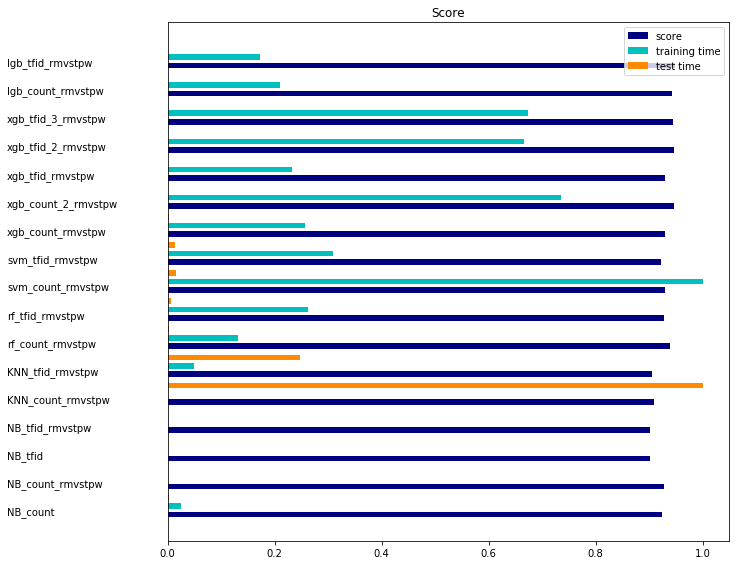

In [87]:
import numpy as np

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

# 整体来看对于本例所用的语料库及二分类问题各模型准确率差别不大，相对而言random forest、SVM、XGBoost、lightgbm准确率稍高一点，其中lightgbm相速度提升比较明显，SVM比较慢，KNN准确率相对低，朴素贝叶斯最快，准确率处于中间。